# Jupyter Notebook Example: How to use this Class

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

## Example 1 - Create Investigation Point

In [2]:
# Example 1 - Create a simple investigation Point with coordinates

from geotechdata.type import Point

# Create a Point instance with just an ID and coordinates
point = Point(
    id="P1",
    coordinates=(40.7128, -74.0060),  # Latitude, Longitude for NYC
    description="NYC Site"
)

print(f"Point created: ID={point.id}, Coordinates={point.coordinates}, Description={point.description}")

Point created: ID=P1, Coordinates=(40.7128, -74.006), Description=NYC Site


## Example 2 - Using BoreholeData and SPTData

SPT Summary Table:
   Depth (m)     Blow Data  Blow Counts
0        3.0   [8, 10, 12]           22
1        6.0  [10, 13, 15]           28
2        9.0  [12, 14, 16]           30
3       12.0          None            0
4       15.0          None           18


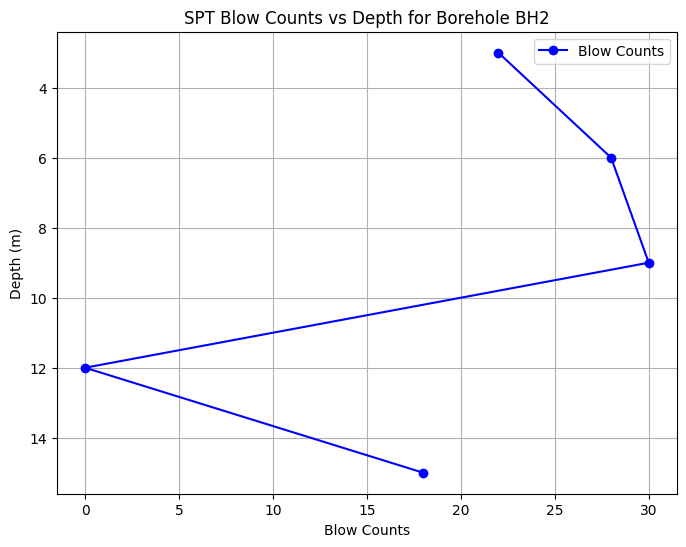

SPTData at 18m: blow_counts=20, blow_data=None


In [3]:
# 1. Import the classes
from geotechdata.borehole import BoreholeData, SPTData

# 2. Create a BoreholeData instance
borehole = BoreholeData(borehole_id="BH2")

# 3. Add SPT data at various depths using both blow_data and blow_counts
borehole.add_spt_data(depth=3.0, blows=[8, 10, 12])           # Standard SPT data
borehole.add_spt_data(depth=6.0, blows=[10, 13, 15])          # Standard SPT data
borehole.add_spt_data(depth=9.0, blows=[12, 14, 16])          # Standard SPT data
borehole.add_spt_data(depth=12.0)                             # No blow data, should default to 0
borehole.add_spt_data(depth=15.0, blow_counts=18)             # Only blow_counts provided

# 4. Generate and display the SPT summary table
summary = borehole.generate_spt_summary()
print("SPT Summary Table:")
print(summary)

# 5. Plot blow counts vs depth
borehole.plot_blow_counts()

# 6. Directly create an SPTData instance with only blow_counts
spt = SPTData(depth=18.0, blow_counts=20)
print(f"SPTData at 18m: blow_counts={spt.blow_counts}, blow_data={spt.blow_data}")

## Example 3 - adding lab test data

In [4]:
# Example 3 - Adding lab test data

from geotechdata.labtest import LabTestData
from geotechdata.type import Point

# Create some lab tests
atterberg = LabTestData(
    test_type="Atterberg Limits",
    depth=2.5,
    test_results={"LL": 45, "PL": 22, "PI": 23},
    test_date="2024-05-18",
    notes="Sample was remolded before testing."
)

triaxial = LabTestData(
    test_type="Triaxial",
    depth=5.0,
    test_results={"Cohesion": 25.0, "Friction Angle": 32.0},
    test_date="2024-05-17"
)

# Create a Point and associate lab tests
point = Point(
    id="P1",
    coordinates=(40.7128, -74.0060),
    description="NYC Site",
    lab_tests=[atterberg, triaxial]
)

# Print summaries of all lab tests for this point
for test in point.lab_tests:
    print(test.summary())
    print("-" * 40)

Test Type: Atterberg Limits
Depth: 2.5 m
Test Date: 2024-05-18
Notes: Sample was remolded before testing.
Results:
  LL: 45
  PL: 22
  PI: 23
----------------------------------------
Test Type: Triaxial
Depth: 5.0 m
Test Date: 2024-05-17
Notes: N/A
Results:
  Cohesion: 25.0
  Friction Angle: 32.0
----------------------------------------
